# TERM-PROJECT: Mid-term Report

## Deblurring selfies using convolutional auto encoder

### 산업경영공학과 2020103913 김동규

### 알아두셔야 할 사항

[텀프로젝트 제안서]('./term_project_proposal.md')에 이 프로젝트의 전체적인 내용과 제안한 이유, 제작계획 및 원리 설명이 나와있습니다. 참고 부탁드립니다. 제안서와 중복되는 내용은 따로 첨부하지 않았습니다. 

이번 중간 보고서에서는 데이터 전처리 과정을 설명합니다. 목차는 다음과 같습니다. 

1. 이미지 불러오기 (인스타 및 kaggle)
2. 이미지에 사람 얼굴이 있는지 검사 (opencv 이용)
3. 사람 얼굴을 중심으로 특정 해상도로 이미지 자르기
4. 데이터에 랜덤으로 blur 처리하기

더불어, 모든 내용은 이 [github repo](https://github.com/vkehfdl1/deblur_autoencoder_selfie)에 공유되고 있습니다. pull request, fork, clone, issue 제보는 언제든지 환영합니다.

추가로, 모든 코딩은 linux 환경 및 kaggle docker 위에서 작업하였으며, 이에 따라 기타 OS에서는 실행이 되지 않을 수도 있는 점 참고 부탁드립니다.

### 이미지 불러오기

먼저 인스타그램에서 '#증명사진'을 검색하면 나오는 사진들을 자동으로 크롤링하였습니다. BeautifulSoup4와 Selenium, 그리고 chrome driver를 활용하였습니다. 코드는 [여기서](./get_data_insta.ipynb) 확인하실 수 있습니다. 

아래는 인스타그램에서 크롤링한 사진들입니다.

In [3]:
from utils import visualize_many_images
import glob

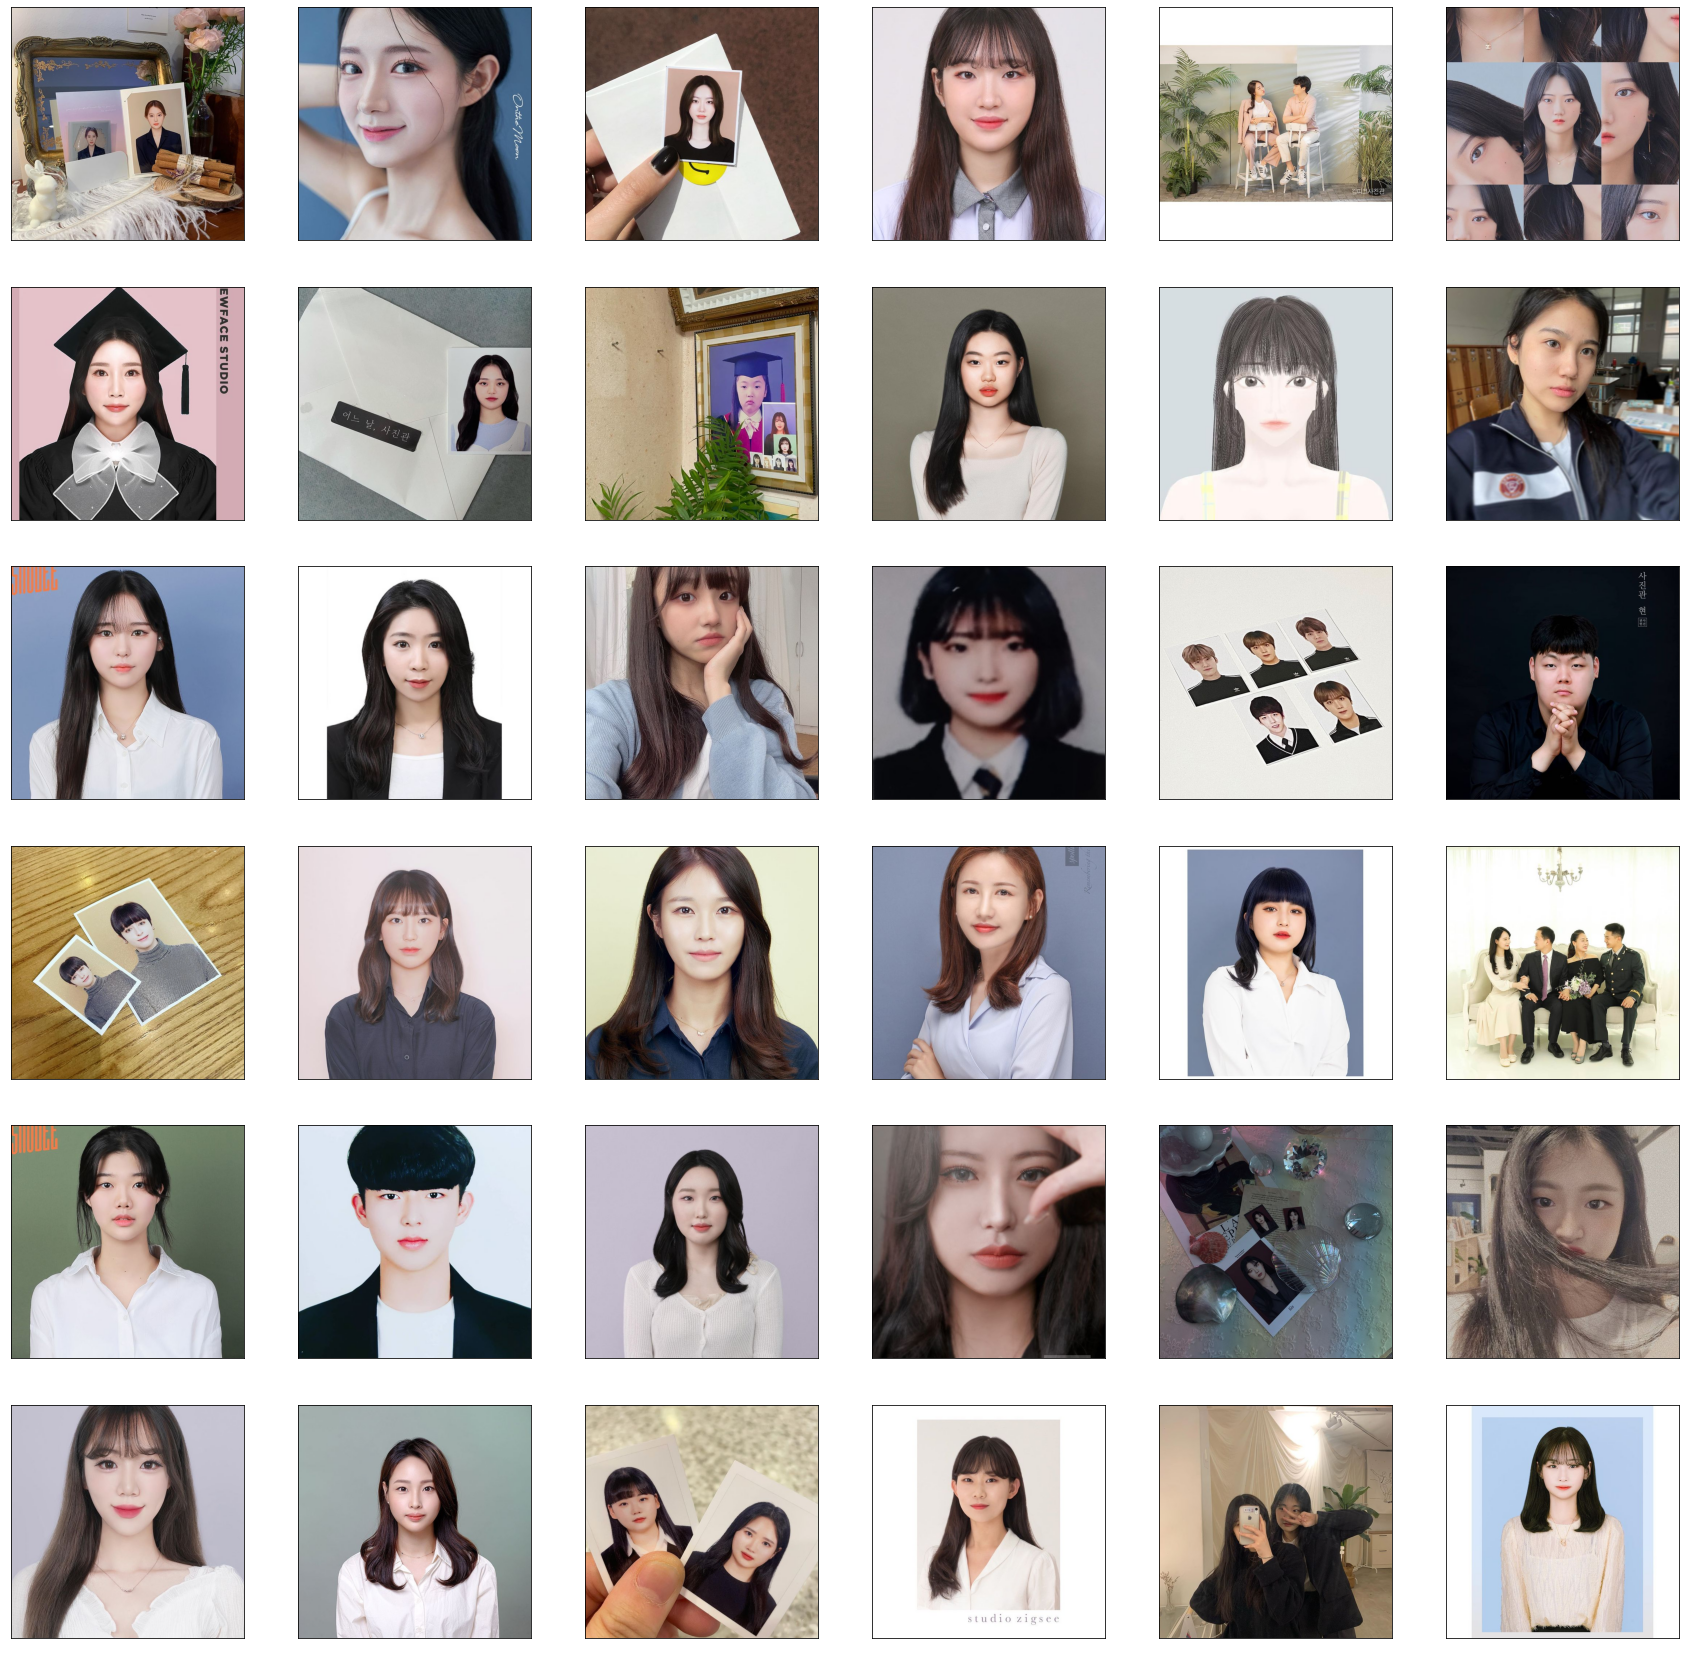

In [4]:
visualize_many_images(glob.glob("./img/*.jpg"))

더불어, kaggle에서 human face dataset을 이용하여 사진들을 확보하였습니다. 이는 kaggle API를 이용해서 쉽게 다운로드 받을 수 있었습니다. [관련정보](https://teddylee777.github.io/kaggle/Kaggle-API-%EC%82%AC%EC%9A%A9%EB%B2%95) 
```
kaggle datasets download -d ashwingupta3012/human-faces
```
아래는 kaggle dataset에 포함된 얼굴 사진들입니다. 

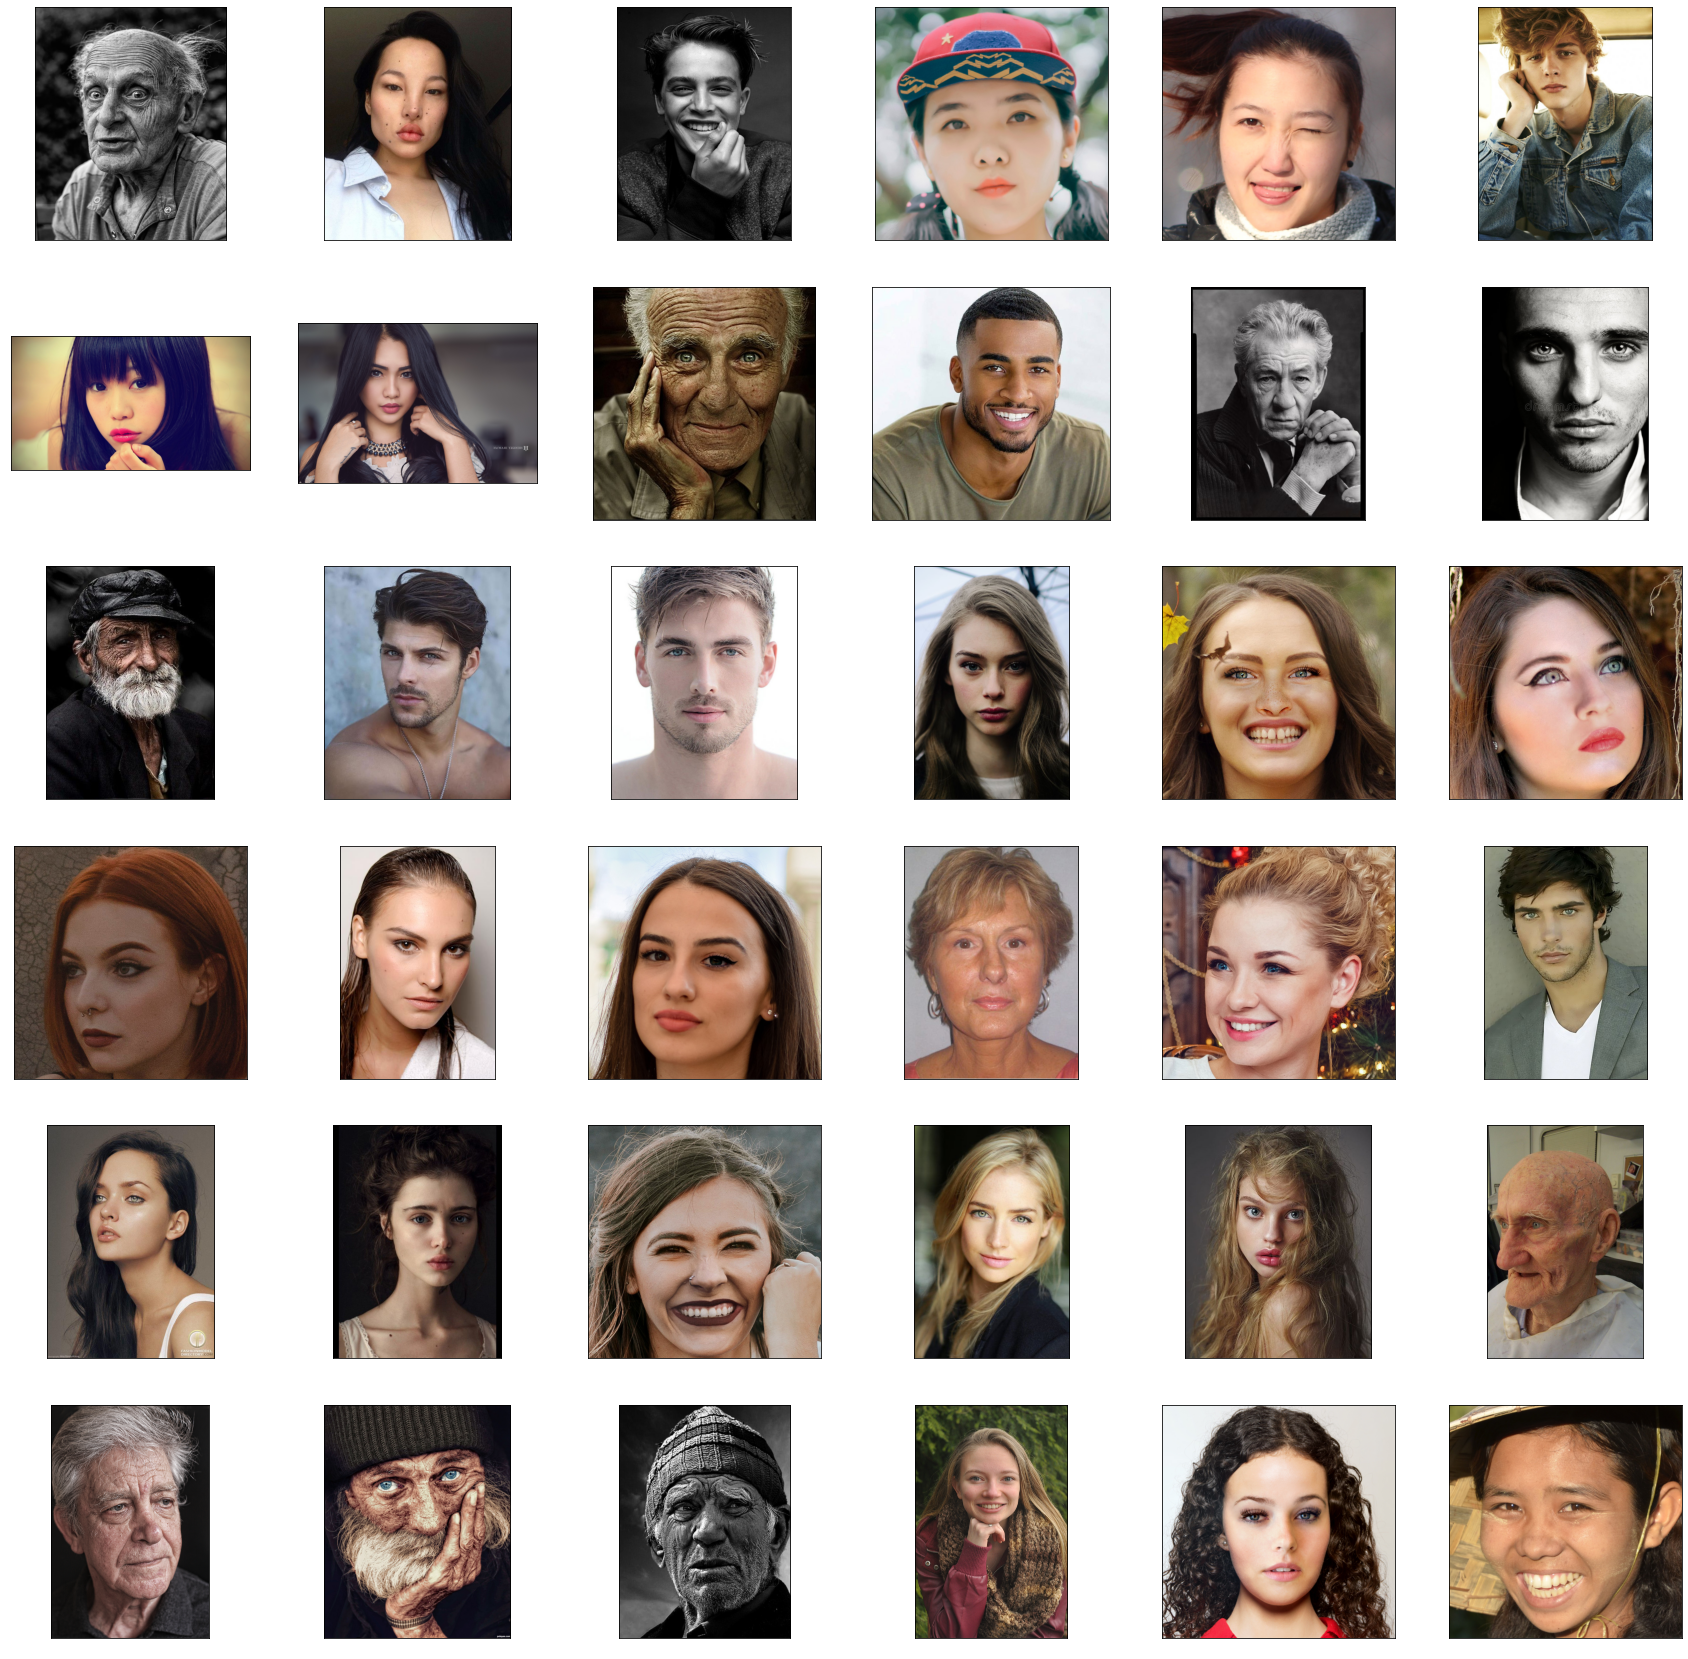

In [5]:
visualize_many_images(glob.glob("./kaggle_img/Humans/*.jpg"))

### 이미지에서 사람 얼굴 탐지

[opencv](https://opencv.org/)를 이용하여 간단하게 사람의 얼굴을 탐지할 수 있습니다. 이것을 기준으로 하여 인스타그램에서 크롤링한 사진 중에서, 사람의 얼굴이 없거나 적합하지 않은 사진을 자동으로 분류해낼 수 있습니다. 자세한 코드는 [이곳](./visualize_pics.ipynb)에서 확인할 수 있습니다.